# Extended Data Figure 4 - Ye et al. 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='ticks')
import pandas as pd

def plot_extended_figure4e():
    results = pd.read_csv('../data/Extended_Figure4/results.csv', index_col=0)
    print(results)

def plot_extended_figure4f():
    complexity = pd.read_csv('../data/Extended_Figure4/complexity.csv', index_col=0)
    print(complexity)

plot_extended_figure4e()

           ViT-MAE  ViT-DeIT  TokenPose (HRNet)  TokenPose (CNN)  HRNet
iRodent       26.6      28.2               40.7             39.5   40.3
AwA-OOD       38.2      38.9               55.6             53.5   53.3
TriMouse      32.4      34.2               33.4             43.5   28.1
Openfield     63.6      62.4               91.5             82.7   72.3


In [2]:
plot_extended_figure4f()

                   Params, M  MACs, G
ViT-MAE                29.80      7.5
ViT-DeIT               15.00      8.8
TokenPose (HRNet)       7.51     20.1
TokenPose (CNN)        86.00     17.6
HRNet                  86.00     17.6


/var/folders/ct/4w_vk2wn10xb_xj2fm7d6vqc0000gn/T/ipykernel_56957/3509976544.py:16: RuntimeWarning: Mean of empty slice
  df_ = pd.DataFrame(np.nanmean(v2, axis=(0, 2)), columns=['val'])


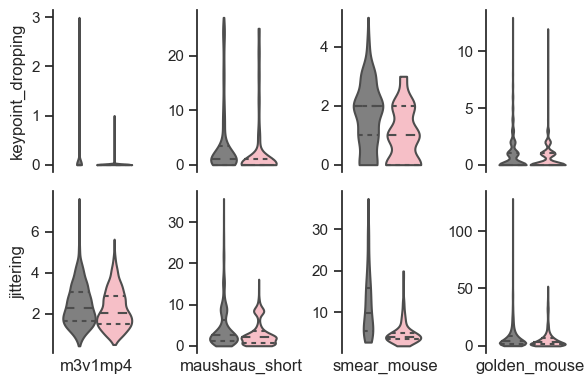

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dict_ = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5').to_dict()
dfs = []

for k, v in dict_.items():
    if not ('keypoint_dropping' in k or 'jittering' in k):
        continue
    temp = []
    for k2, v2 in v.items():
        try:
            df_ = pd.DataFrame(v2, columns=['val'])
        except ValueError:
            df_ = pd.DataFrame(np.nanmean(v2, axis=(0, 2)), columns=['val'])
        df_['video'] = k2
        temp.append(df_)
    temp = pd.concat(temp)
    temp['cond'] = k[0]
    temp['metric'] = k[1]
    temp['niters'] = int(k[2])
    dfs.append(temp)

df = pd.concat(dfs)
df_ = df
videos = list(df_.video.unique())
niters = dict(zip(videos, [2000, 1000, 2000, 1000]))
metrics = list(df_.metric.unique())

fig, axes = plt.subplots(
    2, 4, sharex=True, sharey=False, tight_layout=True, figsize=(6, 4),
)

for i, video in enumerate(videos):
    for j, metric in enumerate(metrics):
        temp = df_[
            (df_['video'] == video) & (df_['metric'] == metric) & ((df_['niters'] == 200000) | (df_['niters'] == niters[video]))
        ]
        ax = axes[j, i]
        sns.violinplot(
            temp, x='metric', y='val',
            cut=0,
            palette=['grey', 'lightpink'],  # Change the palette here
            hue='cond', ax=ax,
            inner='quartiles',
            hue_order=['before_adapt', 'after_adapt']
        )
        ax.set_xticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend().set_visible(False)
        sns.despine(ax=ax, bottom=True)

for ax, metric in zip(axes[:, 0], metrics):
    ax.set_ylabel(metric)

for ax, video in zip(axes[1], videos):
    ax.set_xlabel(video)

fig.align_ylabels()
plt.savefig('violin_plot.png', dpi=300, bbox_inches='tight', transparent = True)
plt.show()